In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# add root path (parent folder) to path
import os
import sys
cwd = os.getcwd()
root_path = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.insert(0, root_path)

import pysta
import stc
import stcl
%load_ext autoreload
%autoreload 2

In [2]:
def remove_box():
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [3]:
# ANOVA
# https://www.pythonfordatascience.org/anova-python/
from scipy import stats
def do_anova(df, col, key='contrast', key_values=[50, 80, 100]):
    return stats.f_oneway(df[col][df[key] == key_values[0]],
                           df[col][df[key] == key_values[1]],
                           df[col][df[key] == key_values[2]])

## Compare across contrasts

In [4]:
data_path = os.path.join(root_path,'data/gaussian_stim_data')

infos = list()
for contrast in [50, 80, 100]:
    # info
    info = pd.read_csv(os.path.join(data_path, 'contrast{}_sta.csv'.format(contrast)))
    info['contrast'] = contrast
    
    infos.append(info)
    
infos = pd.concat(infos)

In [5]:
infos['sta peak difference'] = infos['sta max'] - infos['sta min']

In [6]:
infos

,channel,cell type,number of spikes,sta std,sta max,sta min,contrast,sta peak difference
0,ch_12a,ON-OFF,2906,0.005827,0.521070,0.484837,50,0.036233
1,ch_13a,ON,23447,0.002625,0.508134,0.492791,50,0.015343
2,ch_13b,ON,8302,0.003691,0.517215,0.489712,50,0.027504
3,ch_14a,ON,15922,0.002606,0.508029,0.492249,50,0.015780
4,ch_14b,ON-OFF,18073,0.002882,0.510346,0.490118,50,0.020227
...,...,...,...,...,...,...,...,...
101,ch_86a,OFF,8918,0.011459,0.685100,0.391667,100,0.293433
102,ch_86b,OFF,11685,0.006805,0.588128,0.460443,100,0.127686
103,ch_87a,ON-OFF,23387,0.006672,0.582740,0.455379,100,0.127360
104,ch_87b,ON-OFF,4304,0.008134,0.554649,0.471234,100,0.083415


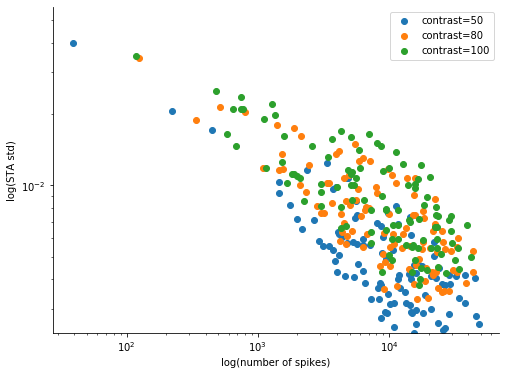

In [7]:
plt.figure(figsize=(8,6))
for group, data in infos.groupby('contrast'):
    plt.scatter(data['number of spikes'], data['sta std'], label='contrast={}'.format(group))
#     print(group, data)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(number of spikes)')
plt.ylabel('log(STA std)')
remove_box()

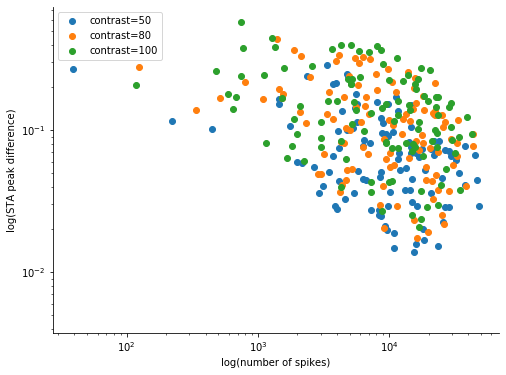

In [8]:
plt.figure(figsize=(8,6))
for group, data in infos.groupby('contrast'):
    plt.scatter(data['number of spikes'], data['sta peak difference'], label='contrast={}'.format(group))
#     print(group, data)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(number of spikes)')
plt.ylabel('log(STA peak difference)')
remove_box()

Text(0.5, 1.0, 'ANOVA p=0.76')

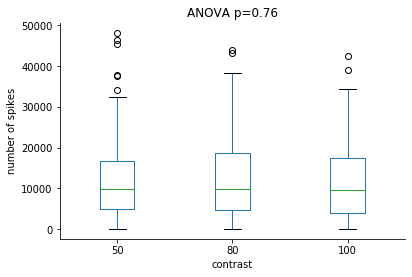

In [9]:
col = 'number of spikes'
infos.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
remove_box()

val, p = do_anova(infos, col)
plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))

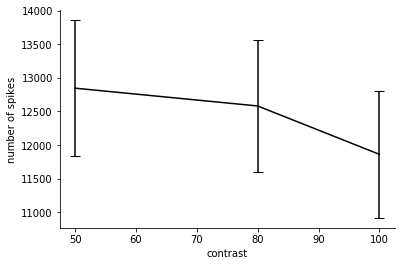

In [10]:
# plot with error bar
col = 'number of spikes'
m = infos.groupby('contrast').mean()[col]
s = infos.groupby('contrast').sem()[col]

plt.errorbar([50, 80, 100], m, s, color='k',  capsize=5)
plt.xlabel('contrast')
plt.ylabel(col)
remove_box()

Text(0.5, 1.0, 'ANOVA p=0.00')

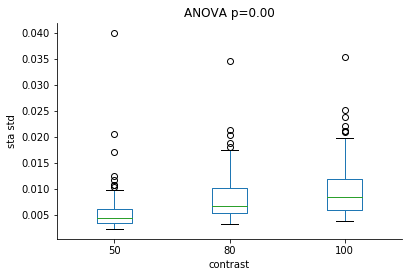

In [11]:
col = 'sta std'
infos.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
remove_box()

val, p = do_anova(infos, col)
plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))

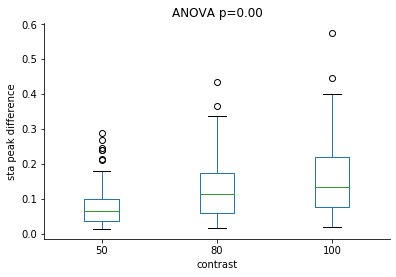

In [12]:
col = 'sta peak difference'
infos.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
remove_box()

val, p = do_anova(infos, col)
plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))

plt.savefig(os.path.join(data_path, 'figure', 'sta_p2p_vs_contrast.png'), dpi=150)

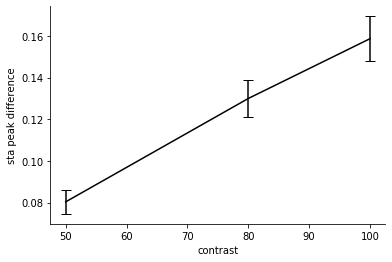

In [13]:
# plot with error bar
m = infos.groupby('contrast').mean()[col]
s = infos.groupby('contrast').sem()[col]

plt.errorbar([50, 80, 100], m, s, color='k',  capsize=5)

# YLIM=list(plt.ylim())
# YLIM[0] = 0
# plt.ylim(YLIM)

plt.xlabel('contrast')
plt.ylabel(col)
remove_box()

Text(0.5, 1.0, 'ANOVA p=0.00')

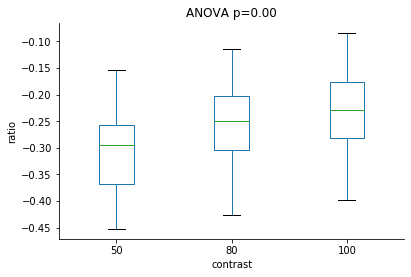

In [14]:
infos['ratio'] =  np.log(infos['sta peak difference']) / np.log(infos['number of spikes'])

col = 'ratio'
infos.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
remove_box()

val, p = do_anova(infos, col)

plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))


In [15]:
infos.groupby('contrast').mean()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,12845.150943,0.005625,0.559004,0.478657,0.080346,-0.306407
80,12580.179245,0.008174,0.589892,0.459955,0.129937,-0.253893
100,11859.971698,0.009973,0.604062,0.445438,0.158624,-0.235332


In [16]:
infos.groupby('contrast').sem()

,cell type,channel,number of spikes,ratio,sta max,sta min,sta peak difference,sta std
contrast,,,,,,,,
50,NaN,NaN,1011.492719,0.007245,0.004520,0.001776,0.005786,0.000432
80,NaN,NaN,976.052526,0.007404,0.006659,0.002955,0.008784,0.000454
100,NaN,NaN,946.834290,0.007668,0.007844,0.004009,0.010762,0.000524


## Are `number of spikes` different for different contrast levels?

In [17]:
idx_on = infos['cell type']=='ON'
idx_off = infos['cell type']=='OFF'
idx_on_off = infos['cell type']== 'ON-OFF'

infos['cell type'].value_counts()

ON         126
ON-OFF     102
OFF         51
Unknown     39
Name: cell type, dtype: int64

F_onewayResult(statistic=0.10130558312669492, pvalue=0.90373216777671)
F_onewayResult(statistic=0.10664669940342711, pvalue=0.8990555543448764)
F_onewayResult(statistic=0.09253104141457348, pvalue=0.9116996591460084)


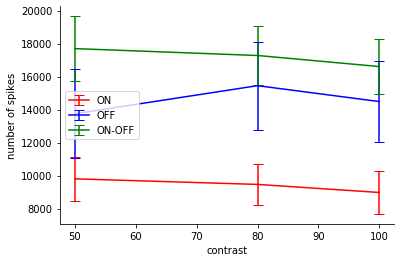

In [18]:
key = 'contrast'
col = 'number of spikes'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], infos.loc[idx,:].groupby(key)[col].mean(), infos.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(infos.loc[idx_on,:], col))
print(do_anova(infos.loc[idx_off,:], col))
print(do_anova(infos.loc[idx_on_off,:], col))
remove_box()

F_onewayResult(statistic=6.432935178763816, pvalue=0.002202298977801334)
F_onewayResult(statistic=7.77711271292906, pvalue=0.0011866519989934753)
F_onewayResult(statistic=30.979613055767746, pvalue=3.56046159094592e-11)


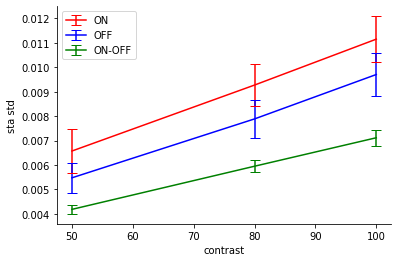

In [19]:
key = 'contrast'
col = 'sta std'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], infos.loc[idx,:].groupby(key)[col].mean(), infos.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(infos.loc[idx_on,:], col))
print(do_anova(infos.loc[idx_off,:], col))
print(do_anova(infos.loc[idx_on_off,:], col))
remove_box()

## Are `sta peak difference` different for different contrast levels?

[0.00238452163564422, 0.008819364493262658, 1.2238596355484607e-06]


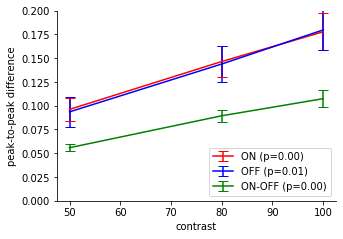

In [28]:
key = 'contrast'
col = 'sta peak difference'

ps = list()
tmp, p = do_anova(infos.loc[idx_on,:], col)
ps.append(p)
tmp, p = do_anova(infos.loc[idx_off,:], col)
ps.append(p)
tmp, p = do_anova(infos.loc[idx_on_off,:], col)
ps.append(p)

print(ps)

# plt.figure(figsize=(8,6))
plt.figure(figsize=(5,3.5))
colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], infos.loc[idx,:].groupby(key)[col].mean(), infos.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON (p={:.2f})'.format(ps[0]), 'OFF (p={:.2f})'.format(ps[1]), 'ON-OFF (p={:.2f})'.format(ps[2])])

plt.ylim([0, 0.2])

plt.ylabel('peak-to-peak difference')

remove_box()

plt.savefig(os.path.join(data_path, 'figure', 'sta_p2p_vs_contrast_by_cell_type.png'), dpi=150)

In [21]:
# ON cells
infos.loc[idx_on,:].groupby('contrast').mean()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,9806.666667,0.006572,0.571325,0.475239,0.096086,-0.305017
80,9468.214286,0.009273,0.602732,0.456337,0.146395,-0.256457
100,8980.523810,0.011152,0.620176,0.442516,0.177660,-0.235164


In [22]:
# ON cells
infos.loc[idx_on,:].groupby('contrast').std()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,8742.136686,0.005913,0.059677,0.022771,0.075754,0.087610
80,8195.461542,0.005649,0.083418,0.036695,0.108066,0.089928
100,8422.496621,0.006077,0.095818,0.048471,0.127350,0.090979


In [23]:
# OFF cells
infos.loc[idx_off,:].groupby('contrast').mean()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,13750.235294,0.005475,0.570038,0.476554,0.093484,-0.280232
80,15451.000000,0.007887,0.596292,0.452510,0.143782,-0.226285
100,14488.588235,0.009704,0.613810,0.434200,0.179610,-0.200932


In [24]:
# OFF cells
infos.loc[idx_off,:].groupby('contrast').std()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,11071.754674,0.002479,0.051351,0.015764,0.065911,0.073784
80,10985.698578,0.003146,0.055227,0.026095,0.078845,0.068373
100,10225.076956,0.003671,0.060314,0.032226,0.087723,0.064058


In [25]:
# ON-OFF cells
infos.loc[idx_on_off,:].groupby('contrast').mean()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,17696.264706,0.004184,0.543793,0.487995,0.055798,-0.315867
80,17278.852941,0.005950,0.562631,0.473268,0.089364,-0.266398
100,16609.382353,0.007116,0.569409,0.462052,0.107356,-0.250370


In [26]:
# ON-OFF cells
infos.loc[idx_on_off,:].groupby('contrast').std()

,number of spikes,sta std,sta max,sta min,sta peak difference,ratio
contrast,,,,,,
50,11434.857393,0.001084,0.020553,0.004187,0.021414,0.060722
80,10337.212402,0.001484,0.029821,0.011104,0.038386,0.057789
100,9683.616270,0.001948,0.034947,0.019902,0.050254,0.060489
